# M-Kappa Parametric Study

In [1]:
%matplotlib widget

In [2]:
from bmcs_cross_section.api import MKappa, ReinforcementType, Reinforcement, TShape, MKappaParamsStudy
import numpy as np
import matplotlib.pyplot as plt
import bmcs_utils.api as bu
import pandas as pd

## Verification with Von der Heid. et al. (2020), [link](https://www.heringinternational.com/fileadmin/media/archive1/downloads/architekturbeton/Bauingenieur_06_2020_S.210-219.pdf), Carbon reinforcement

In [3]:
# HB-SU-0-1 to HB-SU-0-6
excel_file = './verification_data/Von_der_Heid_2020/fig.xlsx'
data = pd.read_excel(excel_file, engine='openpyxl')
k_data= [data['HB-SU-0-1_Curvature'], data['HB-SU-0-2_Curvature'], 
         data['HB-SU-0-3_Curvature'], data['HB-SU-0-4_Curvature'], 
         data['HB-SU-0-5_Curvature'], data['HB-SU-0-6_Curvature']]

m_data= [data['HB-SU-0-1_Moment'], data['HB-SU-0-2_Moment'],
         data['HB-SU-0-3_Moment'], data['HB-SU-0-4_Moment'],
         data['HB-SU-0-5_Moment'], data['HB-SU-0-6_Moment']]

# E = 35786.7
E = 39500

# from bending test from σ_c,Riss
eps_cr = ((6.365 + 6.306 + 5.635 + 5.627 + 5.452 + 5.627)/6)/E

mc = MKappa(reinforcement_type= ReinforcementType.CARBON,
            low_kappa = 0,
            high_kappa = 0.0007,
            E_cc = E,
            E_ct = E,
            eps_cr = eps_cr, # 0.000163
            eps_tu = 9.02/E, 
            eps_cy = 72/E, # 0.0019 from EC2 for C60
            eps_cu = (72/E)*2, # 0.0029 from EC2 for C60
            mu = 0.0)

mc.cross_section_shape.B = 90
mc.cross_section_shape.H = 30
mc.cross_section_layout.reinforcement = [Reinforcement(eps_sy=2712/240000, E=240000, z=8, A=2*3.62),
                                         Reinforcement(eps_sy=2712/240000, E=240000, z=22, A=2*3.62),]

mc.interact()

Parametric study is running...
B: 70, 90, 110, 
H: 20, 30, 40, No solution The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.

E_ct: 35000, 39500, 
E_cc: 35000, 39500, 
Parametric study finished.


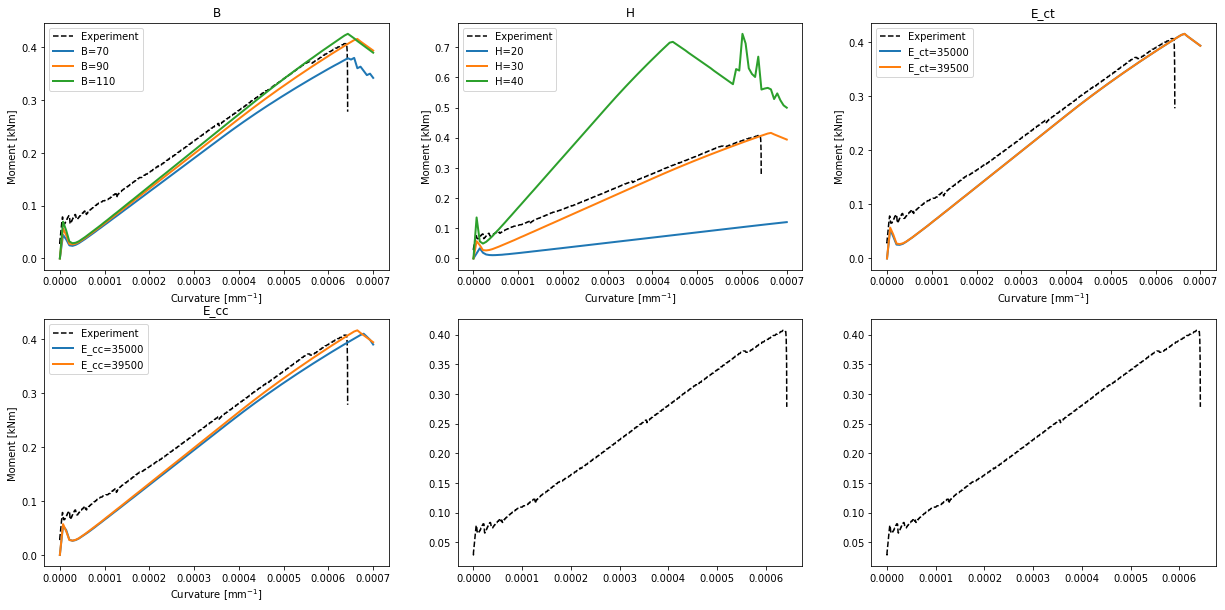

In [5]:
%matplotlib inline
params_config = [
        ['B',      mc.cross_section_shape, [70, 90, 110]],
        ['H',      mc.cross_section_shape, [20, 30, 40]],
        ['E_ct',   mc, [35000, 39500]],
        ['E_cc',   mc, [35000, 39500]],
#         ['eps_cr', mc, [0.0001, 0.000147, 0.0002]],
#         ['eps_cy', mc, [0.0015, 0.00182, 0.002]],
#         ['eps_cu', mc, [0.003, 0.0035, 0.004]],
#         ['eps_tu', mc, [0.0001, 0.000228, 0.0004]],
#         ['mu',     mc, [0, 1]],
#         ['z',      mc.cross_section_layout.reinforcement[0], [1, 29]],
#         ['A',      mc.cross_section_layout.reinforcement[0], [70.14, 2* 70.14]],
#         ['E',      mc.cross_section_layout.reinforcement[0], [130000, 135121, 140000]],
#         ['eps_sy', mc.cross_section_layout.reinforcement[0], [0.010, 0.014, 0.018]],
#         ['n_kappa',mc, [10, 100, 1000]],
]

MKappaParamsStudy(mc).run(params_config, [k_data[0], m_data[0]])